Position and theta are updated using equations given in the paper. Since, the update of position depends upon the direction of motion of the vector, theta is updated first and then position is updated. 


---


**For the ith particle**

Now, theta is updated by the equation

    theta (t+1) = avg(theta(t)) + del(theta)             (1.1)

here: 

1.   **avg(theta(t))** is the average direction calculated by taking the average of directions of the particles (including the ith particle) present in the interaction radius r around the ith particle. This avg(theta(t)) is calculated as:
          avg(theta(t)) = arctan[avg(sin(theta))/avg(cos(theta))]      (1.2)

*   *avg(sin(theta))* : average of sin(theta) for all the particles(including the ith particle) in the interaction radius r
*   *avg(cos(theta))* : average of cos(theta) for all the particles including the ith particle in the interaction radius r


2.   **del(theta)** is a random number chosen from the interval (-eta/2, eta/2), all of which have uniform probability. Thus del(theta) is the noise


After theta is updated, the position can now be updated accordingly using the equation: *(bold letters denote 2-D vectors)*

  **x**(t+1) = **x**(t) + **v**(t).del(t)        (2.1)
    
now, 

*   magnitude of **v**(t), velocity of the particle, at any time is fixed and is equal to 0.03 units (the only thing changing is it's direction)
*   del(t) = 1, is also fixed

This means at each time step, the particle moves 0.03 units of distance in the direction of motion decided by theta. For us to update the particle's position we need to update it's coordinates, thus we have to write the vector in coordinate notation as: 

    x(t+1) = x(t) + v(t)cos(theta).del(t)
    or, x(t+1) = x(t) + 0.03cos(theta).1                (2.2)

    y(t+1) = y(t) + v(t)sin(theta).del(t)
    or, y(t+1) = y(t) + 0.03sin(theta).1                (2.3)
here, theta is the average direction of the particle which was updated using equation (1.1)


---
Using loop function for time t given, the program is run and the position and theta keep on updating with each time step thus generating the Vicsek model simualtion *(Hopefully...)*


After plotting the graphs by changing the noise and density, we see that the motion of the particles changes from random to ordered as the noise is decreased. To further understand how this transition from random to ordered motion (kinetic phase transition) occurs, a new parameter is introduced. This is called the order parameter, given as the absolute value of the average normalised velocity. *(Bold characters denote vector)*

  va = (1/Nv).|(vector sum of all **vi** from i=1 to N)|
  
    va = (1/Nv).|

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation as animation
from IPython import display

**For Simulation of Vicsek Model**

In [ ]:
N = 300 # Number of particles
L = 25 # Length of a particle
rho = N/L*L # Particle number density
r = 2 # Interaction radius of particle
eta = 0.1 # Noise
del_t = 1 # Time step
v = 0.03 # Velocity of particles
t = 2000

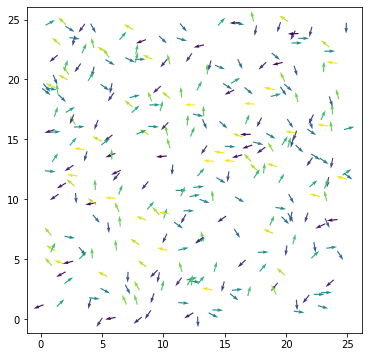

In [ ]:
pos = np.random.uniform(0,L,size=(N,2))
theta = np.random.uniform(-np.pi, np.pi,size=N)
fig, ax= plt.subplots(figsize=(6,6))
qv = ax.quiver(pos[:,0], pos[:,1], np.cos(theta), np.sin(theta), theta, clim=[-np.pi, np.pi])

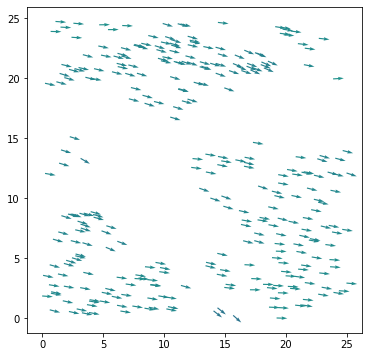

In [ ]:
for k in range(t):  #repeating for 2000 iterations
  for i in range(N): #updating position and theta for all N
    x1 = pos[i][0]
    y1 = pos[i][1]
    sine = []
    cosine = []
    # scanning for the ith particle
    for j in range(N):
      x2 = pos[j][0]
      y2 = pos[j][1]
      if (x2-x1)*(x2-x1) + (y2-y1)*(y2-y1) <= r: # scanning the particles present inside and on the boundary of the interaction radius
        sine.append(np.sin(theta[j]))
        cosine.append(np.cos(theta[j]))
    avg_sin = np.average(sine)
    avg_cos = np.average(cosine)
    avg_theta = np.arctan(float(avg_sin/avg_cos)) # average direction of all the particles in the interaction radius
    rand_numb = np.random.uniform(-0.5*eta, 0.5*eta, size = 1) # random noise allotment
    theta[i] = avg_theta + rand_numb[0] # updating theta (direction of velocity of ith particle)

    pos[i][0] = pos[i][0] + v*np.cos(theta[i]) # updating x coordinate of ith particle
    pos[i][1] = pos[i][1] + v*np.sin(theta[i]) # updating y coordinate of ith particle

    # for periodic boundary conditions 
    if pos[i][0] > L:
      pos[i][0] = pos[i][0] - L
    if pos[i][0] < 0:
      pos[i][0] = pos[i][0] + L

    if pos[i][1] > L:
      pos[i][1] = pos[i][1] - L
    if pos[i][1] < 0:
      pos[i][1] = pos[i][1] + L

fig, ax= plt.subplots(figsize=(6,6))
qv = ax.quiver(pos[:,0], pos[:,1], np.cos(theta), np.sin(theta), theta, clim=[-np.pi, np.pi])

**For Animating the Simulation**

In [ ]:
'''
def animate(i):
	for k in range(t):  
	  for i in range(N): 
	    x1 = pos[i][0]
	    y1 = pos[i][1]
	    sine = []
	    cosine = []
	    # scanning for the ith particle
	    for j in range(N):
	      x2 = pos[j][0]
	      y2 = pos[j][1]
	      if (x2-x1)*(x2-x1) + (y2-y1)*(y2-y1) <= r: # scanning the particles present inside and on the boundary of the interaction radius
	        sine.append(np.sin(theta[j]))
	        cosine.append(np.cos(theta[j]))
	    avg_sin = np.average(sine)
	    avg_cos = np.average(cosine)
	    avg_theta = np.arctan(float(avg_sin/avg_cos)) # average direction of all the particles in the interaction radius
	    rand_numb = np.random.uniform(-0.5*eta, 0.5*eta, size = 1) # random noise allotment
	    theta[i] = avg_theta + rand_numb[0] # updating theta (direction of velocity of ith particle)

	    pos[i][0] = pos[i][0] + v*np.cos(theta[i]) # updating x coordinate of ith particle
	    pos[i][1] = pos[i][1] + v*np.sin(theta[i]) # updating y coordinate of ith particle

	    # for periodic boundary conditions 
	    if pos[i][0] > L:
	      pos[i][0] = pos[i][0] - L
	    if pos[i][0] < 0:
	      pos[i][0] = pos[i][0] + L

	    if pos[i][1] > L:
	      pos[i][1] = pos[i][1] - L
	    if pos[i][1] < 0:
	      pos[i][1] = pos[i][1] + L

	qv.set_offsets(pos)
	qv.set_UVC(np.cos(theta), np.sin(theta), theta)
	return qv,

anim = animation.FuncAnimation(fig, animate, np.arange(1,200), interval=1, blit=True)
plt.show()
'''